### Mapas Sequía (20min)
>Tener en cuenta que el proceso puede llevar más de 20 minutos



In [ ]:
!git clone https://github.com/itzamango/nodejs.git

Cloning into 'nodejs'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 352 (delta 14), reused 62 (delta 11), pack-reused 285
Receiving objects: 100% (352/352), 425.68 MiB | 35.12 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (270/270), done.


In [ ]:
%%time 
!pip install geopandas rtree
!apt install libspatialindex-dev
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install tornado
!pip install rarfile


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package w

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import urllib
import rarfile
import shutil
import os
import zipfile
import re

Mapa de Entidades 

In [ ]:
#url = 'http://www.conabio.gob.mx/informacion/gis/maps/ccl/desta4mgw_c.zip' #División política estatal escala 1:4M
url = 'http://www.conabio.gob.mx/informacion/gis/maps/ccl/dest20gw_c.zip' #División política estatal escala 1:250K
estados_4m = gpd.read_file(url)

Mapa de Municipios

In [ ]:
url = 'http://www.conabio.gob.mx/informacion/gis/maps/ccl/mun20gw_c.zip' #División política municipal escala 1:250000
municipios_250k = gpd.read_file(url)

Desempaquetar archivos

In [ ]:
zip_path = [] # Lista con las rutas de los archivos
path_dir_ = "/content/nodejs/data/shp"
for root, dirs, files in os.walk(path_dir_):
  for file in files:
    if file.endswith(".zip"):
      print(os.path.join(root, file))
      try:
        shutil.unpack_archive(os.path.join(root, file), root)
      except:
        rar_ = rarfile.RarFile(os.path.join(root, file))
        rar_.extractall(root)
        rar_.close()
      zip_path.append([root, file])

Mapa de la sequía


In [ ]:
#2011
pathl = '/content/proyecto_sequia/data/shp/2011/mexseq_201106/Drought_impact_lines_201106.shp'
patht = '/content/proyecto_sequia/data/shp/2011/mexseq_201106/Drought_impact_types_201106.shp'
path0 = '/content/proyecto_sequia/data/shp/2011/mexseq_201106/c_201106_d0.shp'
path1 = '/content/proyecto_sequia/data/shp/2011/mexseq_201106/c_201106_d1.shp'
path2 = '/content/proyecto_sequia/data/shp/2011/mexseq_201106/c_201106_d2.shp'
path3 = '/content/proyecto_sequia/data/shp/2011/mexseq_201106/c_201106_d3.shp'
path4 = '/content/proyecto_sequia/data/shp/2011/mexseq_201106/c_201106_d4.shp'

tipos = gpd.read_file(patht)
lineas= gpd.read_file(pathl)
d0    = gpd.read_file(path0)
d1    = gpd.read_file(path1)
d2    = gpd.read_file(path2)
d3    = gpd.read_file(path3)
d4    = gpd.read_file(path4)

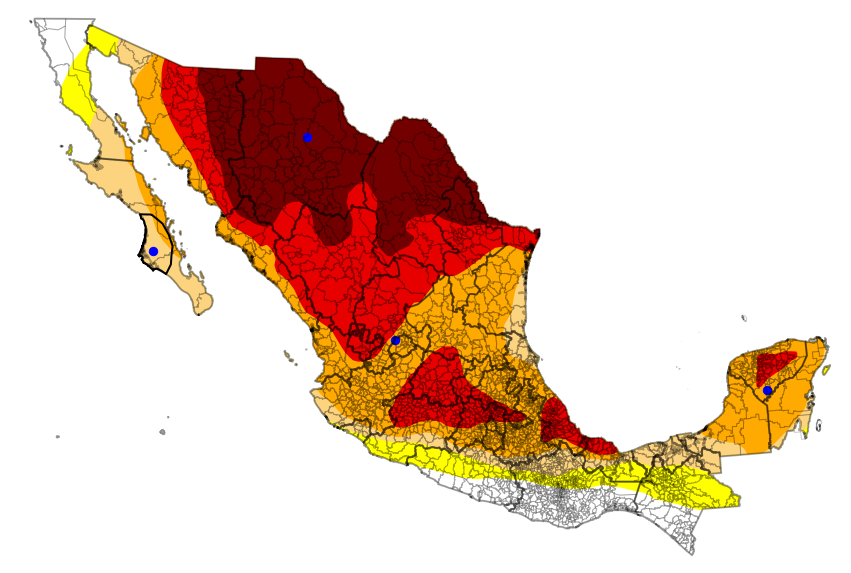

In [ ]:
ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
plt.xlim([967841.85207785, 4135966.06056838])
plt.ylim([278545.20953247, 2394099.94821663])
d0.plot(ax=ax, color='#FFFF00', zorder=0)
d1.plot(ax=ax, color='#FCD37F', zorder=1)
d2.plot(ax=ax, color='#FFAA00', zorder=2)
d3.plot(ax=ax, color='#E60000', zorder=3)
d4.plot(ax=ax, color='#730000', zorder=4)
lineas.to_crs(crs='EPSG:6372').plot(ax=ax, color='None', edgecolor='black', linewidth=2, zorder=5)
tipos.to_crs(crs='EPSG:6372').plot(ax=ax, color='blue', markersize=70, zorder=6)
estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
plt.axis('off')

plt.savefig('20110630',dpi=300, bbox_inches='tight' ,pad_inches = 0)

In [ ]:
#2015
pathl = '/content/proyecto_sequia/data/shp/2015/mexseq_201506_30/Drought_impact_lines_201506_30.shp'
patht = '/content/proyecto_sequia/data/shp/2015/mexseq_201506_30/Drought_impact_types_201506_30.shp'
path0 = '/content/proyecto_sequia/data/shp/2015/mexseq_201506_30/mexseq_201506_30_d0.shp'
path1 = '/content/proyecto_sequia/data/shp/2015/mexseq_201506_30/mexseq_201506_30_d1.shp'
path2 = '/content/proyecto_sequia/data/shp/2015/mexseq_201506_30/mexseq_201506_30_d2.shp'
path3 = '/content/proyecto_sequia/data/shp/2015/mexseq_201506_30/mexseq_201506_30_d3.shp'

tipos = gpd.read_file(patht)
lineas= gpd.read_file(pathl)
d0    = gpd.read_file(path0)
d1    = gpd.read_file(path1)
d2    = gpd.read_file(path2)
d3    = gpd.read_file(path3)

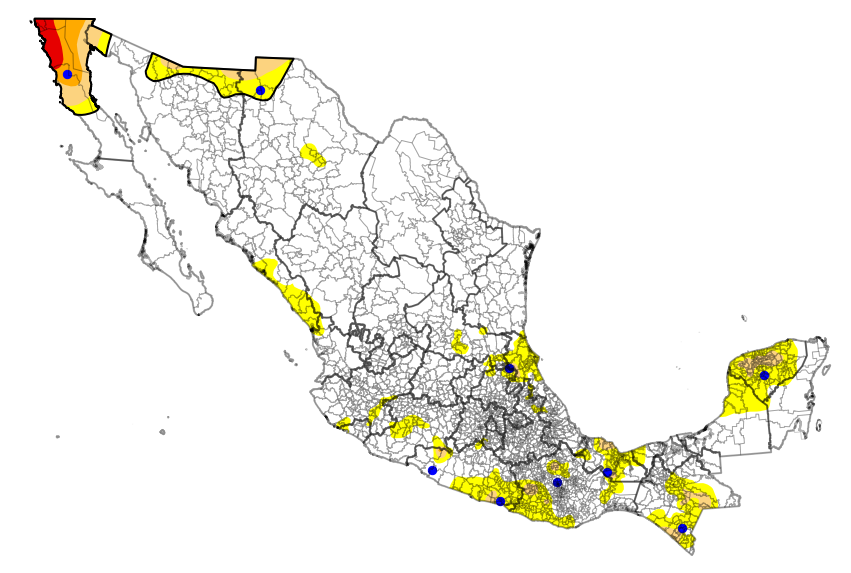

In [ ]:
ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
plt.xlim([967841.85207785, 4135966.06056838])
plt.ylim([278545.20953247, 2394099.94821663])
d0.plot(ax=ax, color='#FFFF00', zorder=0)
d1.plot(ax=ax, color='#FCD37F', zorder=1)
d2.plot(ax=ax, color='#FFAA00', zorder=2)
d3.plot(ax=ax, color='#E60000', zorder=3)
lineas.to_crs(crs='EPSG:6372').plot(ax=ax, color='None', edgecolor='black', linewidth=2, zorder=5)
tipos.to_crs(crs='EPSG:6372').plot(ax=ax, color='blue', markersize=70, zorder=6)
estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
plt.axis('off')

plt.savefig('20150630',dpi=300, bbox_inches='tight' ,pad_inches = 0)

In [ ]:
#2018
patht = '/content/proyecto_sequia/data/shp/2018/mexseq_201806_30/mexseq_tipos_impacto_201806_30.shp'
path0 = '/content/proyecto_sequia/data/shp/2018/mexseq_201806_30/mexseq_201806_30_d0.shp'
path1 = '/content/proyecto_sequia/data/shp/2018/mexseq_201806_30/mexseq_201806_30_d1.shp'
path2 = '/content/proyecto_sequia/data/shp/2018/mexseq_201806_30/mexseq_201806_30_d2.shp'
path3 = '/content/proyecto_sequia/data/shp/2018/mexseq_201806_30/mexseq_201806_30_d3.shp'
path4 = '/content/proyecto_sequia/data/shp/2018/mexseq_201806_30/mexseq_201806_30_d4.shp'

tipos = gpd.read_file(patht)
d0    = gpd.read_file(path0)
d1    = gpd.read_file(path1)
d2    = gpd.read_file(path2)
d3    = gpd.read_file(path3)
d4    = gpd.read_file(path4)

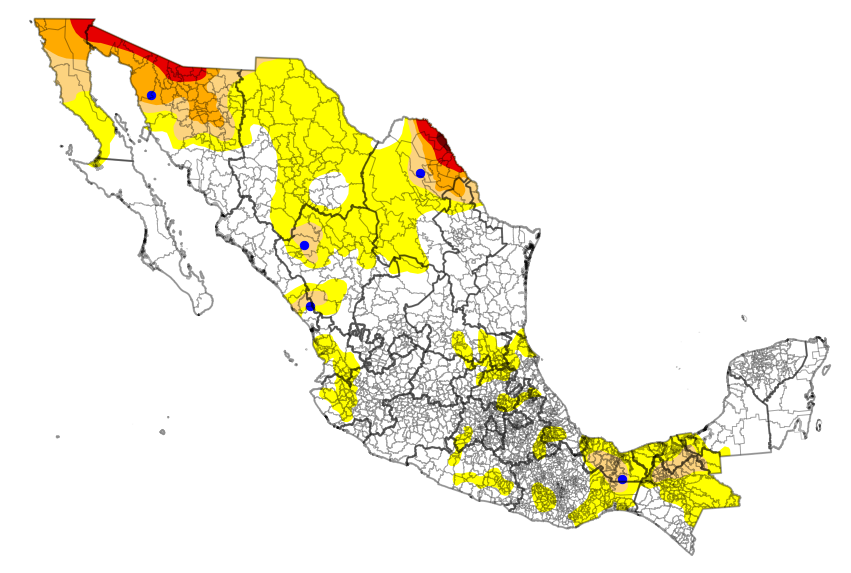

In [ ]:
ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
plt.xlim([967841.85207785, 4135966.06056838])
plt.ylim([278545.20953247, 2394099.94821663])
d0.plot(ax=ax, color='#FFFF00', zorder=0)
d1.plot(ax=ax, color='#FCD37F', zorder=1)
d2.plot(ax=ax, color='#FFAA00', zorder=2)
d3.plot(ax=ax, color='#E60000', zorder=3)
d4.plot(ax=ax, color='#730000', zorder=4)
tipos.to_crs(crs='EPSG:6372').plot(ax=ax, color='blue', markersize=70, zorder=6)
estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
plt.axis('off')

plt.savefig('20210630',dpi=300, bbox_inches='tight' ,pad_inches = 0)

In [ ]:
#2021
pathl = '/content/proyecto_sequia/data/shp/2021/mexseq_202106_30/mexseq_lineas_impacto_202106_30.shp'
patht = '/content/proyecto_sequia/data/shp/2021/mexseq_202106_30/mexseq_tipos_impacto_202106_30.shp'
path0 = '/content/proyecto_sequia/data/shp/2021/mexseq_202106_30/mexseq_202106_30_d0.shp'
path1 = '/content/proyecto_sequia/data/shp/2021/mexseq_202106_30/mexseq_202106_30_d1.shp'
path2 = '/content/proyecto_sequia/data/shp/2021/mexseq_202106_30/mexseq_202106_30_d2.shp'
path3 = '/content/proyecto_sequia/data/shp/2021/mexseq_202106_30/mexseq_202106_30_d3.shp'
path4 = '/content/proyecto_sequia/data/shp/2021/mexseq_202106_30/mexseq_202106_30_d4.shp'


lineas= gpd.read_file(pathl)
tipos = gpd.read_file(patht)
d0    = gpd.read_file(path0)
d1    = gpd.read_file(path1)
d2    = gpd.read_file(path2)
d3    = gpd.read_file(path3)
d4    = gpd.read_file(path4)

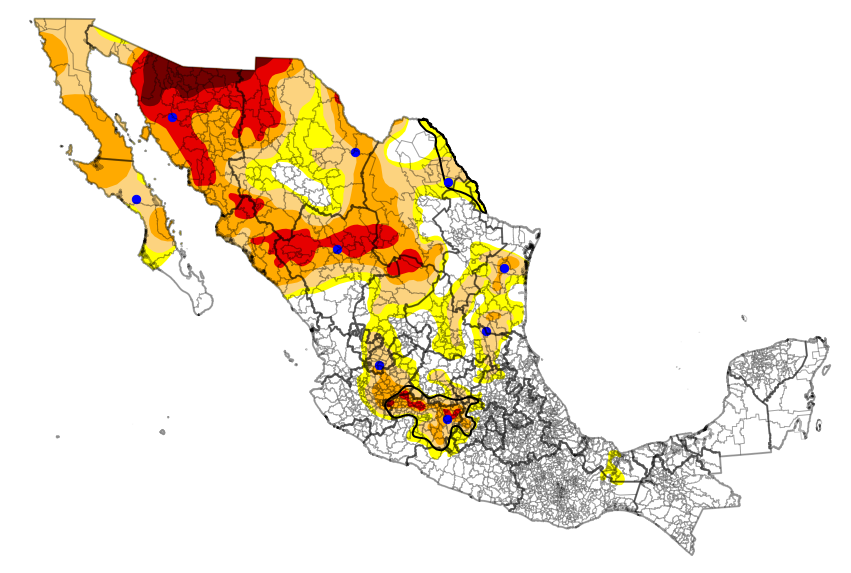

In [ ]:
ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
plt.xlim([967841.85207785, 4135966.06056838])
plt.ylim([278545.20953247, 2394099.94821663])
d0.plot(ax=ax, color='#FFFF00', zorder=0)
d1.plot(ax=ax, color='#FCD37F', zorder=1)
d2.plot(ax=ax, color='#FFAA00', zorder=2)
d3.plot(ax=ax, color='#E60000', zorder=3)
d4.plot(ax=ax, color='#730000', zorder=4)
lineas.to_crs(crs='EPSG:6372').plot(ax=ax, color='None', edgecolor='black', linewidth=2, zorder=5)
tipos.to_crs(crs='EPSG:6372').plot(ax=ax, color='blue', markersize=70, zorder=6)
estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
plt.axis('off')

plt.savefig('20210630',dpi=300, bbox_inches='tight' ,pad_inches = 0)

Concatenación en un solo DataFrame


In [ ]:
%%time
# Concatenamos 
gdf = gpd.GeoDataFrame([])
for root, dirs, files in os.walk("/content/nodejs"):
  for file_ in files:
    if file_.endswith(".shp"):
      shp_file = os.path.join(root, file_)
      gdf_temp = gpd.read_file(shp_file).to_crs(crs='EPSG:6372')
      gdf_temp['file'] = file_
      gdf_temp['zip'] = root
      gdf = pd.concat([gdf, gdf_temp], ignore_index=True)

CPU times: user 11min 11s, sys: 13.9 s, total: 11min 25s
Wall time: 11min 21s


In [ ]:
gdf

,ID,AREA,tipo,geometry,file,zip,Id,Type,FID_impact,FID_Drough,FID_Drou_1,Id_1,Id_12,FID_Drou_2,Id_12_13,FID_Drou_3,Id_12_1_14,Shape_Leng,Shape_Le_1,Shape_Area,FID_impa_1,FID_Drou_4,FID_Drou_5,Id_12_1_15,Id_12_1_16,Id_12_1_17,FID_Drou_6,Id_12_1_18,FID_Drou_7,Id_12_1_19,OBJECTID,Shape_Le_2,F_AREA,DM,AREA1,CODE,NAME,POP1991,POP91_SQMI,PERIMETER,...,Shape_L_31,Shape_L_32,Shape_L_33,Shape_L_34,Shape_L_35,Shape_L_36,Shape_L_37,Shape_L_38,Shape_L_39,Shape_L_40,Shape_L_41,Shape_L_42,Shape_L_43,Shape_L_44,Shape_L_45,Shape_L_46,Shape_L_47,Shape_L_48,Shape_L_49,Shape_L_50,Shape_L_51,Shape_L_52,Shape_L_53,Shape_L_54,Shape_L_55,Shape_L_56,Shape_L_57,Shape_L_58,Shape_L_59,Shape_L_60,Shape_L_61,Shape_L_62,Shape_L_63,Shape_L_64,POP1990,POP90_SQMI,P_URBAN90,P_ING_LANG,P_EMPL_SEC,HSE_UNIT90
0,0.0,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",mexseq_201607_15_d2.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",mexseq_201607_15_d0.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,POINT (3509652.109 408824.856),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,0.0,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,POINT (2926208.312 474997.128),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,0.0,SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,POINT (3606790.441 517741.441),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,0.0,SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,NaN,NaN,NaN,POINT (3722322.021 837337.716),Drought_impact_types_200702.shp,/content/nodejs/data/shp/2007/mexseq_200702,0.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3791,NaN,NaN,NaN,POINT (2906772.022 772232.854),Drought_impact_types_200702.shp,/content/nodejs/data/shp/2007/mexseq_200702,0.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Guardado GEOJSON

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
gdf = gpd.read_file('/content/drive/MyDrive/mapas_sequia.geojson')

CPU times: user 2min 58s, sys: 8.65 s, total: 3min 7s
Wall time: 3min 6s


In [ ]:
%%time
# Guardamos el archivo como GeoJson
gdf.to_file("mapas_sequia.geojson", driver='GeoJSON')

In [ ]:
gdf_copy = gdf.copy()

In [ ]:
gdf = gdf_copy.copy()

### Mapas Sequía

Checamos la información del dataset pero al ser tantas columnas no tenemos una descripción

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3795 entries, 0 to 3794
Columns: 125 entries, ID to HSE_UNIT90
dtypes: float64(115), geometry(1), object(9)
memory usage: 3.6+ MB


Realizamos un dataframe con el porcentaje de nan, el total de nan y el total de datos que no son nan por columna para las primeras 62 columnas y ls restantes

In [ ]:
porcentajes = map(lambda x: f'{x:.3f}', gdf.isna().sum()/gdf.shape[0])
pd.DataFrame(list(zip(porcentajes,
                      gdf.isna().sum(), 
                      (~gdf.isna()).sum())),
              columns =['porcentaje_na','total_na', 'total_no_na'], index=gdf.columns).T.iloc[:, 0:62]


,ID,AREA,tipo,geometry,file,zip,Id,Type,FID_impact,FID_Drough,FID_Drou_1,Id_1,Id_12,FID_Drou_2,Id_12_13,FID_Drou_3,Id_12_1_14,Shape_Leng,Shape_Le_1,Shape_Area,FID_impa_1,FID_Drou_4,FID_Drou_5,Id_12_1_15,Id_12_1_16,Id_12_1_17,FID_Drou_6,Id_12_1_18,FID_Drou_7,Id_12_1_19,OBJECTID,Shape_Le_2,F_AREA,DM,AREA1,CODE,NAME,POP1991,POP91_SQMI,PERIMETER,ACRES,CLASS,SOURCETHM,Nombre,ARERA,Shape_Le_3,Shape_Le_4,FID_impa_2,Shape_Le_5,Shape_Le_6,Shape_Ar_1,FID_impa_3,FID_Drou_8,FID_Drou_9,Id_12_1_20,Id_12_1_21,Id_12_1_22,FID_Dro_10,Id_12_1_23,FID_Dro_11,Id_12_1_24,Shape_Le_7
porcentaje_na,0.820,0.669,0.807,0.000,0.000,0.000,0.304,0.451,0.961,0.924,0.925,0.923,0.923,0.930,0.925,0.930,0.930,0.929,0.960,0.929,0.961,0.961,0.961,0.961,0.961,0.961,0.961,0.961,0.961,0.961,0.967,0.996,0.997,0.977,0.997,0.992,0.992,0.990,0.990,0.989,0.989,0.992,0.990,1.000,0.999,0.996,0.996,0.997,0.996,0.996,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.996
total_na,3113,2540,3063,0,0,0,1153,1713,3646,3508,3509,3504,3504,3530,3509,3530,3530,3525,3642,3524,3647,3647,3647,3647,3647,3647,3647,3647,3647,3646,3670,3778,3782,3709,3785,3766,3766,3757,3757,3753,3753,3766,3758,3794,3793,3779,3779,3784,3779,3779,3784,3784,3784,3784,3784,3784,3784,3784,3784,3784,3784,3779
total_no_na,682,1255,732,3795,3795,3795,2642,2082,149,287,286,291,291,265,286,265,265,270,153,271,148,148,148,148,148,148,148,148,148,149,125,17,13,86,10,29,29,38,38,42,42,29,37,1,2,16,16,11,16,16,11,11,11,11,11,11,11,11,11,11,11,16


In [ ]:
porcentajes = map(lambda x: f'{x:.3f}', gdf.isna().sum()/gdf.shape[0])
pd.DataFrame(list(zip(porcentajes, 
                      gdf.isna().sum(), 
                      (~gdf.isna()).sum())), 
             columns =['porcentaje_na','total_na', 'total_no_na'], index=gdf.columns).T.iloc[:, 62:]


,Shape_Le_8,Shape_Le_9,Shape_L_10,Shape_L_11,Shape_L_12,Shape_L_13,Shape_L_14,Shape_L_15,Shape_L_16,Shape_L_17,Shape_L_18,Shape_L_19,Shape_L_20,Shape_L_21,Shape_L_22,Shape_L_23,Shape_L_24,Shape_L_25,Shape_L_26,Shape_L_27,Shape_L_28,Shape_L_29,Shape_L_30,Shape_L_31,Shape_L_32,Shape_L_33,Shape_L_34,Shape_L_35,Shape_L_36,Shape_L_37,Shape_L_38,Shape_L_39,Shape_L_40,Shape_L_41,Shape_L_42,Shape_L_43,Shape_L_44,Shape_L_45,Shape_L_46,Shape_L_47,Shape_L_48,Shape_L_49,Shape_L_50,Shape_L_51,Shape_L_52,Shape_L_53,Shape_L_54,Shape_L_55,Shape_L_56,Shape_L_57,Shape_L_58,Shape_L_59,Shape_L_60,Shape_L_61,Shape_L_62,Shape_L_63,Shape_L_64,POP1990,POP90_SQMI,P_URBAN90,P_ING_LANG,P_EMPL_SEC,HSE_UNIT90
porcentaje_na,0.996,0.996,0.996,0.996,0.996,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
total_na,3781,3781,3781,3781,3781,3783,3783,3783,3783,3783,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785,3786,3786,3786,3786,3786,3786,3786,3786,3788,3788,3788,3790,3791,3791,3791,3791,3791,3791,3791,3792,3792,3792,3792,3793,3793,3793,3793,3794,3794,3794,3794,3794,3794,3794,3794,3794,3794
total_no_na,14,14,14,14,14,12,12,12,12,12,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,7,7,7,5,4,4,4,4,4,4,4,3,3,3,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1


Consultamos el número de columnas que son de algún tipo numérico

In [ ]:
len(gdf.select_dtypes(include=['number']).columns)

115

Vemos las columnas cuya suma del valor absoluto de números es cero. Esa cifra no nos interesa porque no tiene que ver con áreas ni ningún código de Entidad o de sequía así que las eliminamos

In [ ]:
cols_type_n    = gdf.select_dtypes(include=['number']).columns
cols_zero_mask = abs(gdf[cols_type_n]).sum().eq(0)
cols_zero      = gdf[cols_type_n].columns[cols_zero_mask]
gdf = gdf.drop(cols_zero, axis=1)
gdf.head(3)

,ID,AREA,tipo,geometry,file,zip,Id,Type,FID_impact,FID_Drough,FID_Drou_3,Id_12_1_14,Shape_Leng,Shape_Le_1,Shape_Area,FID_impa_1,OBJECTID,Shape_Le_2,F_AREA,DM,AREA1,CODE,NAME,POP1991,POP91_SQMI,PERIMETER,ACRES,CLASS,SOURCETHM,Nombre,ARERA,Shape_Le_3,Shape_Le_4,Shape_Le_5,Shape_Le_6,Shape_Le_7,Shape_Le_8,Shape_Le_9,Shape_L_10,Shape_L_11,Shape_L_12,Shape_L_13,Shape_L_14,Shape_L_17,Shape_L_29,Shape_L_30,Shape_L_31,Shape_L_32,Shape_L_33,Shape_L_34,Shape_L_35,Shape_L_36,Shape_L_37,Shape_L_38,Shape_L_39,Shape_L_40,Shape_L_41,Shape_L_42,Shape_L_43,Shape_L_44,Shape_L_45,Shape_L_46,Shape_L_47,Shape_L_48,Shape_L_49,Shape_L_50,Shape_L_51,Shape_L_52,Shape_L_53,Shape_L_54,Shape_L_55,Shape_L_56,Shape_L_57,Shape_L_58,Shape_L_59,Shape_L_60,Shape_L_61,Shape_L_62,Shape_L_63,Shape_L_64
0,0.0,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",mexseq_201607_15_d2.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",mexseq_201607_15_d0.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,POINT (3509652.109 408824.856),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,0.0,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos si hay alguna columna que tenga todos sus registros cero, pero no hay ninguna

In [ ]:
(gdf == 0).all().sum()

0

Checamos qué columnas son las que no empiezan con Shape ya que hay muchas columnas que empiezan de esa manera

In [ ]:
starts_w_shape= [True if col.startswith('Shape') else False for col in gdf]
gdf.loc[:, map(lambda x: not x, starts_w_shape)].head(3)

,ID,AREA,tipo,geometry,file,zip,Id,Type,FID_impact,FID_Drough,FID_Drou_3,Id_12_1_14,FID_impa_1,OBJECTID,F_AREA,DM,AREA1,CODE,NAME,POP1991,POP91_SQMI,PERIMETER,ACRES,CLASS,SOURCETHM,Nombre,ARERA
0,0.0,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",mexseq_201607_15_d2.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",mexseq_201607_15_d0.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,POINT (3509652.109 408824.856),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,0.0,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos los porcentajes de na, el total y los valores no na para las columnas que quedan

In [ ]:
porcentajes = map(lambda x: f'{x:.3f}', gdf.isna().sum()/gdf.shape[0])
pd.DataFrame(list(zip(porcentajes, 
                      gdf.isna().sum(), 
                      (~gdf.isna()).sum())),
              columns =['porcentaje_na','total_na', 'total_no_na'], index=gdf.columns).T 


,ID,AREA,tipo,geometry,file,zip,Id,Type,FID_impact,FID_Drough,FID_Drou_3,Id_12_1_14,Shape_Leng,Shape_Le_1,Shape_Area,FID_impa_1,OBJECTID,Shape_Le_2,F_AREA,DM,AREA1,CODE,NAME,POP1991,POP91_SQMI,PERIMETER,ACRES,CLASS,SOURCETHM,Nombre,ARERA,Shape_Le_3,Shape_Le_4,Shape_Le_5,Shape_Le_6,Shape_Le_7,Shape_Le_8,Shape_Le_9,Shape_L_10,Shape_L_11,Shape_L_12,Shape_L_13,Shape_L_14,Shape_L_17,Shape_L_29,Shape_L_30,Shape_L_31,Shape_L_32,Shape_L_33,Shape_L_34,Shape_L_35,Shape_L_36,Shape_L_37,Shape_L_38,Shape_L_39,Shape_L_40,Shape_L_41,Shape_L_42,Shape_L_43,Shape_L_44,Shape_L_45,Shape_L_46,Shape_L_47,Shape_L_48,Shape_L_49,Shape_L_50,Shape_L_51,Shape_L_52,Shape_L_53,Shape_L_54,Shape_L_55,Shape_L_56,Shape_L_57,Shape_L_58,Shape_L_59,Shape_L_60,Shape_L_61,Shape_L_62,Shape_L_63,Shape_L_64
porcentaje_na,0.820,0.669,0.807,0.000,0.000,0.000,0.304,0.451,0.961,0.924,0.930,0.930,0.929,0.960,0.929,0.961,0.967,0.996,0.997,0.977,0.997,0.992,0.992,0.990,0.990,0.989,0.989,0.992,0.990,1.000,0.999,0.996,0.996,0.996,0.996,0.996,0.996,0.996,0.996,0.996,0.996,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000
total_na,3113,2540,3063,0,0,0,1153,1713,3646,3508,3530,3530,3525,3642,3524,3647,3670,3778,3782,3709,3785,3766,3766,3757,3757,3753,3753,3766,3758,3794,3793,3779,3779,3779,3779,3779,3781,3781,3781,3781,3781,3783,3783,3783,3785,3785,3785,3785,3785,3786,3786,3786,3786,3786,3786,3786,3786,3788,3788,3788,3790,3791,3791,3791,3791,3791,3791,3791,3792,3792,3792,3792,3793,3793,3793,3793,3794,3794,3794,3794
total_no_na,682,1255,732,3795,3795,3795,2642,2082,149,287,265,265,270,153,271,148,125,17,13,86,10,29,29,38,38,42,42,29,37,1,2,16,16,16,16,16,14,14,14,14,14,12,12,12,10,10,10,10,10,9,9,9,9,9,9,9,9,7,7,7,5,4,4,4,4,4,4,4,3,3,3,3,2,2,2,2,1,1,1,1


Vemos los valores que continen algunas columnas

In [ ]:
gdf['OBJECTID'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
gdf['CLASS'].unique()

array([nan, None, 'd3', 'd1', 'd0', 'd2', 'd4'], dtype=object)

Vemos que los datos contienen información de lugares internacionales

In [ ]:
gdf['NAME'].unique()

array([nan, None, 'Aguascalientes', 'Alberta', 'Saskatchewan', 'Ontario',
       'British Columbia', 'Manitoba'], dtype=object)

In [ ]:
gdf['DM'].unique()

array([nan,  0.,  3.,  4.,  1.,  2.])

Vemos cuántas de las columnas no son de algún tipo numérico y qué columnas tenemos

In [ ]:
len(gdf.select_dtypes(exclude=['number']).columns)

10

In [ ]:
gdf.columns

Index(['ID', 'AREA', 'tipo', 'geometry', 'file', 'zip', 'Id', 'Type',
       'FID_impact', 'FID_Drough', 'FID_Drou_3', 'Id_12_1_14', 'Shape_Leng',
       'Shape_Le_1', 'Shape_Area', 'FID_impa_1', 'OBJECTID', 'Shape_Le_2',
       'F_AREA', 'DM', 'AREA1', 'CODE', 'NAME', 'POP1991', 'POP91_SQMI',
       'PERIMETER', 'ACRES', 'CLASS', 'SOURCETHM', 'Nombre', 'ARERA',
       'Shape_Le_3', 'Shape_Le_4', 'Shape_Le_5', 'Shape_Le_6', 'Shape_Le_7',
       'Shape_Le_8', 'Shape_Le_9', 'Shape_L_10', 'Shape_L_11', 'Shape_L_12',
       'Shape_L_13', 'Shape_L_14', 'Shape_L_17', 'Shape_L_29', 'Shape_L_30',
       'Shape_L_31', 'Shape_L_32', 'Shape_L_33', 'Shape_L_34', 'Shape_L_35',
       'Shape_L_36', 'Shape_L_37', 'Shape_L_38', 'Shape_L_39', 'Shape_L_40',
       'Shape_L_41', 'Shape_L_42', 'Shape_L_43', 'Shape_L_44', 'Shape_L_45',
       'Shape_L_46', 'Shape_L_47', 'Shape_L_48', 'Shape_L_49', 'Shape_L_50',
       'Shape_L_51', 'Shape_L_52', 'Shape_L_53', 'Shape_L_54', 'Shape_L_55',
       'Shape_L_56'

Vemos si los valores en el campo 'CLASS' coincide con el de los archivos, vemos que no es así

In [ ]:
gdf[~ gdf['CLASS'].isna()].loc[:, ['CLASS', 'file']].head(3)

,CLASS,file
2555,d3,mexseq_200801_D3.shp
3657,d1,mexseq_200708_d1.shp
3658,d0,mexseq_200708_d0.shp


Probamos para el campo 'tipo', parece que coinciden

In [ ]:
gdf[~gdf.tipo.isnull()].loc[:, ['tipo', 'file']].head(3)

,tipo,file
0,d2,mexseq_201607_15_d2.shp
1,d0,mexseq_201607_15_d0.shp
23,d1,mexseq_201607_15_d1.shp


### Mapas Sequía

Nos quedamos con las columnas que tienen al menos un 15% de datos no nulos y eliminamos el id que no nos interesa

In [ ]:
gdf = gdf.dropna(thresh=round(gdf.shape[0]*.15), axis=1).drop(['Id', 'ID'], axis=1)
gdf.head(3)

,AREA,tipo,geometry,file,zip,Type
0,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",mexseq_201607_15_d2.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN
1,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",mexseq_201607_15_d0.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN
2,NaN,NaN,POINT (3509652.109 408824.856),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,L


Pasamos los nombres de las columnas a minúsculas

In [ ]:
gdf.columns = gdf.columns.str.lower()
gdf.head(3)

,area,tipo,geometry,file,zip,type
0,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",mexseq_201607_15_d2.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN
1,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",mexseq_201607_15_d0.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN
2,NaN,NaN,POINT (3509652.109 408824.856),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,L


Hacemos un listado de los archivos .shp que hay

In [ ]:
archivos = []

path_dir_ = "/content/nodejs/data/shp"
for root, dirs, files in os.walk(path_dir_):
  for file in files:
    if file.endswith(".shp"):
      archivos.append(file)

len(archivos)

1574

Reemplazamos los espacio por guiones bajo y los que se puedan repetir doble vez y reemplazamos los nombres en inglés

In [ ]:
#archivos_df.isna().sum()

In [ ]:
#archivos_df.head(3)

### Mapas Sequía

In [ ]:
archivos_lower = list(map(lambda x: x.lower().replace(' ', '_').replace('__', '_'), archivos))

In [ ]:
import re
archivos_lower = [*map(lambda name: re.sub('dr?ought_impacts?_lines?', 'mexseq_lineas_impacto', name), archivos_lower)]
archivos_lower = [*map(lambda name: re.sub('dr?ought_impacts?_types?', 'mexseq_tipos_impacto', name), archivos_lower)]
archivos_lower = [*map(lambda name: re.sub('dr?ought_impacts?_labels?', 'mexseq_tipos_impacto', name), archivos_lower)]

Definimos un patrón y grupos para expresiones regulares

In [ ]:
descripcion_re = 'mexseq_tipos_impacto\
|mexseq_lineas_impacto\
|mexseq\
|c'

anio_re = '20[0-2][0-9]'
mes_re  = '[0-1][0-9]'
dia_re  = '[0-3][0-9]'
tipo_re = 'd[0-4]'

pattern_name = F'(?P<descripcion>{descripcion_re})\
_(?P<anio>{anio_re})\
(?P<mes>{mes_re})\
_?(?P<dia>{dia_re})?\
?_?(?P<tipo>{tipo_re})?\
.*'

pattern_name_regex = re.compile(pattern_name)
archivos_re = pd.DataFrame([*map(lambda x: pattern_name_regex.search(x), archivos_lower)])

Vemos que archivos no coinciden con las regex que hicimos. Vemos que solo tienen el año de referencia y obtenemos sus índices

In [ ]:
#Cuales no entraron en regex
from functools import reduce
file_no_regex = pd.DataFrame(archivos).iloc[archivos_re.isnull().values].values.tolist()
file_list_nre = [file_ for sublist in file_no_regex for file_ in sublist]
file_list_nre

['C_2010_D0.shp', 'Drought_impact_types_2012.shp']

In [ ]:
index_faltan = pd.DataFrame(archivos).iloc[archivos_re.isnull().values].index
index_faltan

Int64Index([727, 1088], dtype='int64')

Vemos a cuál corresponde cada índice

In [ ]:
nombre_faltan = pd.DataFrame(archivos).loc[index_faltan].values
nombre_faltan

array([['C_2010_D0.shp'],
       ['Drought_impact_types_2012.shp']], dtype=object)

Vemos en qué carpeta estan los que no coinciden

In [ ]:
gdf2 = gdf.copy()

In [ ]:
faltantes = []
path_dir_ = "/content/nodejs/data/shp"
for root, dirs, files in os.walk(path_dir_):
  for file_ in files:
    if any(file_ in string for string in file_list_nre):
      faltantes.append([file_, f'{root}/{file_}'])

faltantes_df = pd.DataFrame(faltantes)

In [ ]:
faltantes_df[1] = faltantes_df[1].str.extract(r'(?P<carpeta>mexseq_[0-9]{6})')
faltantes_df

,0,1
0,C_2010_D0.shp,mexseq_201010
1,Drought_impact_types_2012.shp,mexseq_201112


Vemos que archivos no se extrajeron en su propia carpeta

In [ ]:
len(gdf.reset_index().file.unique())

1573

In [ ]:
gdf_copy.shape

(3795, 125)

In [ ]:
gdf

,area,tipo,geometry,file,zip,type
0,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",mexseq_201607_15_d2.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN
1,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",mexseq_201607_15_d0.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,NaN
2,NaN,NaN,POINT (3509652.109 408824.856),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,L
3,NaN,NaN,POINT (2926208.312 474997.128),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,SL
4,NaN,NaN,POINT (3606790.441 517741.441),mexseq_tipos_impacto_201607_15.shp,/content/nodejs/data/shp/2016/mexseq_201607_15,SL
...,...,...,...,...,...,...
3790,NaN,NaN,POINT (3722322.021 837337.716),Drought_impact_types_200702.shp,/content/nodejs/data/shp/2007/mexseq_200702,A
3791,NaN,NaN,POINT (2906772.022 772232.854),Drought_impact_types_200702.shp,/content/nodejs/data/shp/2007/mexseq_200702,A
3792,NaN,NaN,POINT (1079788.571 2318469.877),Drought_impact_types_200702.shp,/content/nodejs/data/shp/2007/mexseq_200702,A
3793,NaN,NaN,"POLYGON ((2563530.066 1991605.574, 2579863.709...",mexseq_200702_d4.shp,/content/nodejs/data/shp/2007/mexseq_200702,NaN


In [ ]:
gdf['carpeta'] = gdf['zip'].str.extract('(?P<carpeta>[0-9]{4}.*)')
mask=gdf['carpeta'].str.len().eq(4)
gdf[mask].head(3)

,area,tipo,geometry,file,zip,type,carpeta
1958,9223.572638,d3,"MULTIPOLYGON (((2965938.775 992477.991, 297228...",mexseq_201912_15_d3.shp,/content/nodejs/data/shp/2019,NaN,2019
1959,NaN,NaN,POINT (3534352.857 567901.672),mexseq_tipos_impacto_201911_30.shp,/content/nodejs/data/shp/2019,L,2019
1960,NaN,NaN,POINT (3265633.287 615489.080),mexseq_tipos_impacto_201911_30.shp,/content/nodejs/data/shp/2019,L,2019


In [ ]:
gdf.file

0                  mexseq_201607_15_d2.shp
1                  mexseq_201607_15_d0.shp
2       mexseq_tipos_impacto_201607_15.shp
3       mexseq_tipos_impacto_201607_15.shp
4       mexseq_tipos_impacto_201607_15.shp
                       ...                
3790       Drought_impact_types_200702.shp
3791       Drought_impact_types_200702.shp
3792       Drought_impact_types_200702.shp
3793                  mexseq_200702_d4.shp
3794                  mexseq_200702_d2.shp
Name: file, Length: 3795, dtype: object

Corregimos los que faltan


In [ ]:
corregido = nombre_faltan
lista_corregido_re = pd.DataFrame(corregido, index=index_faltan)[0].apply(lambda x: pattern_name_regex.search(x))

In [ ]:
archivos_re.loc[index_faltan] = pd.DataFrame(lista_corregido_re)
archivos_re.isnull().sum()

0    2
dtype: int64

In [ ]:
gdf.isna().sum()

area        2540
tipo        3063
geometry       0
file           0
zip            0
type        1713
carpeta        0
dtype: int64

In [ ]:
gdf = gdf.rename(columns={'tipo':'tipo_gdf'})
gdf = gdf.set_index('file')
gdf.head(13)

,area,tipo_gdf,geometry,zip,type,carpeta
file,,,,,,
mexseq_201607_15_d2.shp,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,2016/mexseq_201607_15
mexseq_201607_15_d0.shp,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,2016/mexseq_201607_15
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (3509652.109 408824.856),/content/nodejs/data/shp/2016/mexseq_201607_15,L,2016/mexseq_201607_15
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (2926208.312 474997.128),/content/nodejs/data/shp/2016/mexseq_201607_15,SL,2016/mexseq_201607_15
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (3606790.441 517741.441),/content/nodejs/data/shp/2016/mexseq_201607_15,SL,2016/mexseq_201607_15
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (3186902.130 676876.002),/content/nodejs/data/shp/2016/mexseq_201607_15,L,2016/mexseq_201607_15
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (3470831.225 648812.611),/content/nodejs/data/shp/2016/mexseq_201607_15,S,2016/mexseq_201607_15
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (3741613.840 749893.210),/content/nodejs/data/shp/2016/mexseq_201607_15,S,2016/mexseq_201607_15
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (2504084.032 766033.581),/content/nodejs/data/shp/2016/mexseq_201607_15,L,2016/mexseq_201607_15


In [ ]:
gdf.loc['mexseq_201812_31_d2.shp']

area                                                  20303.6
tipo_gdf                                                   d2
geometry    (POLYGON ((3632702.75030001 627012.8763999975,...
zip            /content/nodejs/data/shp/2018/mexseq_201812_31
type                                                      NaN
carpeta                                 2018/mexseq_201812_31
Name: mexseq_201812_31_d2.shp, dtype: object

De igual modo hacemos un dataframe con los archivos shp y con regex corregimos nombres


In [ ]:
archivos = []
root_ = []
for root, dirs, files in os.walk("/content/nodejs/data/shp"):
  for file_ in files:
    if file_.endswith(".shp"):
      archivos.append(file_)
      root_.append(root.strip(r'(?P<carpeta>mexseq_[0-9]{6}'))


regex_desc = ['dr?ought_impacts?_lines?'
              , 'dr?ought_impacts?_types?'
              , 'dr?ought_impacts?_labels?'
              ]



regex_desc_val = ['mexseq_lineas_impacto',
                  'mexseq_tipos_impacto',
                  'mexseq_tipos_impacto'
                  ]         


archivos_df = pd.DataFrame([archivos, root_], index=['file', 'path']).T
archivos_df['lower'] = archivos_df['file'].str.lower().replace('\s', '_', regex=True).replace('__', '_', regex=True)
archivos_df['lower'].replace(to_replace=regex_desc[0], value=regex_desc_val[0], regex=True, inplace=True)
archivos_df['lower'].replace(to_replace=regex_desc[1], value=regex_desc_val[1], regex=True, inplace=True)
archivos_df['lower'].replace(to_replace=regex_desc[2], value=regex_desc_val[2], regex=True, inplace=True)
archivos_df['path'] = archivos_df['path'].str.extract('(?P<anio_carpeta>[0-9]{3,4}.*)')


archivos_df['re'] = archivos_df['lower'].apply(lambda x: pattern_name_regex.search(x))
archivos_df_no_re = archivos_df[archivos_df['re'].isna()]

Corregimos los nombres de los archivos mediante un diccionario

In [ ]:
dict_no_re = {'C_2010_D0.shp': 'c_201010_d0',
 'Drought_impact_types_2012.shp' : 'mexseq_tipos_impacto_201112.shp'}

archivos_df['lower'].loc[archivos_df_no_re.index] = archivos_df_no_re['file'].replace(to_replace=dict_no_re, value=None)
archivos_df['re'].loc[archivos_df_no_re.index] = archivos_df['lower'].loc[archivos_df_no_re.index].apply(lambda x: pattern_name_regex.search(x))

col_names_file = ['fecha', 'descripcion', 'anio','mes', 'dia', 'tipo']
archivos_df[col_names_file] = archivos_df['lower'].str.split(pat = pattern_name, expand=True).loc[:,:5]

cols = list(archivos_df.columns)
cols = cols[-6::1] + cols[0:-6:1]
archivos_df = archivos_df[cols]

In [ ]:
archivos_df.dia[archivos_df['path'].str.endswith('15')] = 15

Añadimos la columna de fecha y calculamos el día con la biblioteca calendar

In [ ]:
import calendar


n_dias_mes = map(lambda mes: calendar.monthlen(2020, mes), range(1,13))
n_dias_mes = dict(zip(range(1,13), n_dias_mes))
del n_dias_mes[2]


mask_dia = archivos_df['dia'].isnull() 

archivos_df['dia'] = archivos_df['dia']
archivos_df['dia'][mask_dia] = archivos_df['mes'][mask_dia].astype(int).apply(lambda x: n_dias_mes.get(x,None))

mask_feb = archivos_df['dia'].isnull() 

archivos_df['dia'][mask_feb] = archivos_df[mask_feb].apply(lambda fila: calendar.monthlen(int(fila['anio']), 2), axis=1)



# ASEguramos que los na solo sean lineas y puntos
archivos_df[archivos_df['lower'].str.extract(r'(?P<tipo>d[0-4])').isna().values].descripcion.unique()
# que las regiones tengan d
archivos_df[~archivos_df['lower'].str.extract(r'(?P<tipo>d[0-4])').isna().values].descripcion.unique()

archivos_df.descripcion.unique()

array(['mexseq', 'mexseq_tipos_impacto', 'mexseq_lineas_impacto', 'c'],
      dtype=object)

In [ ]:
archivos_df.head(3)

,fecha,descripcion,anio,mes,dia,tipo,file,path,lower,re
0,,mexseq,2016,07,15,None,mexseq_201607_15_d2.shp,2016/mexseq_201607_15,mexseq_201607_15_d2.shp,"<re.Match object; span=(0, 23), match='mexseq_..."
1,,mexseq,2016,07,15,None,mexseq_201607_15_d0.shp,2016/mexseq_201607_15,mexseq_201607_15_d0.shp,"<re.Match object; span=(0, 23), match='mexseq_..."
2,,mexseq_tipos_impacto,2016,07,15,None,mexseq_tipos_impacto_201607_15.shp,2016/mexseq_201607_15,mexseq_tipos_impacto_201607_15.shp,"<re.Match object; span=(0, 34), match='mexseq_..."


Actualizamos la descripción a ciertas cadenas y añadimos los registros de fecha

In [ ]:
tipos_df = archivos_df['lower'].str.extract(r'(?P<tipo_>d[0-4])')
mask_tipos = tipos_df.isna().values

archivos_df['tipo'] = archivos_df[mask]['lower'].str.extract(r'(?P<tipo_>d[0-4])', expand=True)

dict_tipos = dict(zip(['mexseq_tipos_impacto','mexseq_lineas_impacto'], ['ti','li']))

mask_desc_tipo = archivos_df['descripcion'].str.contains('mexseq_tipos_impacto|mexseq_lineas_impacto')
archivos_df['tipo'][mask_desc_tipo] = archivos_df[mask_desc_tipo]['descripcion'].replace(to_replace=dict_tipos)
archivos_df.tipo.unique()

archivos_df['fecha'] = archivos_df['anio'] + '-' + archivos_df['mes'] + '-' + archivos_df['dia'].astype(int).astype(str) #map(F'{:02d}')
archivos_df['descripcion'] = archivos_df['descripcion'].replace(to_replace={'mexseq':'intensidad', 'mexseq_lineas_impacto':'lineas_impacto', 'mexseq_tipos_impacto': 'tipos_impacto', 'c':'intensidad'}, value=None)
archivos_df['descripcion'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0           intensidad
1           intensidad
2        tipos_impacto
3       lineas_impacto
4           intensidad
             ...      
1569        intensidad
1570        intensidad
1571     tipos_impacto
1572        intensidad
1573        intensidad
Name: descripcion, Length: 1574, dtype: object

In [ ]:
archivos_df.head(3)

,fecha,descripcion,anio,mes,dia,tipo,file,path,lower,re
0,2016-07-15,intensidad,2016,07,15,NaN,mexseq_201607_15_d2.shp,2016/mexseq_201607_15,mexseq_201607_15_d2.shp,"<re.Match object; span=(0, 23), match='mexseq_..."
1,2016-07-15,intensidad,2016,07,15,NaN,mexseq_201607_15_d0.shp,2016/mexseq_201607_15,mexseq_201607_15_d0.shp,"<re.Match object; span=(0, 23), match='mexseq_..."
2,2016-07-15,tipos_impacto,2016,07,15,ti,mexseq_tipos_impacto_201607_15.shp,2016/mexseq_201607_15,mexseq_tipos_impacto_201607_15.shp,"<re.Match object; span=(0, 34), match='mexseq_..."


Unimos ambos DataFrame, el de archivos y el GeoDataFrame con solo ciertas columnas

In [ ]:
archivos_df = archivos_df.set_index('file')

In [ ]:
archivos_df.tipo.unique()

In [ ]:
mask_d = archivos_df['lower'].str.extract(r'(?P<tipo_>d[0-4])', expand=True)['tipo_'].isna()

In [ ]:
archivos_df[~mask_d]['lower'].str.extract(r'(?P<tipo_>d[0-4])', expand=True)

,tipo_
file,
mexseq_201607_15_d2.shp,d2
mexseq_201607_15_d0.shp,d0
mexseq_201607_15_d1.shp,d1
mexseq_201607_15_d3.shp,d3
mexseq_201601_15_d1.shp,d1
...,...
mexseq_200702_d1.shp,d1
mexseq_200702_d3.shp,d3
mexseq_200702_d0.shp,d0


In [ ]:
archivos_df['tipo'].isna().sum()

1084

In [ ]:
archivos_df.loc[~mask_d,'tipo'] = archivos_df.loc[~mask_d,'lower'].str.extract(r'(?P<tipo_>d[0-4])', expand=True).loc[:,'tipo_']

In [ ]:
archivos_df['tipo'].isna().sum()

0

In [ ]:
#archivos_df['tipo'] = archivos_df[mask]['lower'].str.extract(r'(?P<tipo_>d[0-4])', expand=True)

In [ ]:
archivos_df[['fecha', 'descripcion', 'anio', 'mes', 'dia', 'tipo']].isna().sum()

fecha          0
descripcion    0
anio           0
mes            0
dia            0
tipo           0
dtype: int64

In [ ]:
gdf[['fecha', 'descripcion', 'anio', 'mes', 'dia', 'tipo']] = archivos_df[['fecha', 'descripcion', 'anio', 'mes', 'dia', 'tipo']]
gdf.head(3)

,area,tipo_gdf,geometry,zip,type,carpeta,fecha,descripcion,anio,mes,dia,tipo
file,,,,,,,,,,,,
mexseq_201607_15_d2.shp,6.088830e+04,d2,"MULTIPOLYGON (((3550059.431 349757.694, 354728...",/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,2016/mexseq_201607_15,2016-07-15,intensidad,2016,07,15,d2
mexseq_201607_15_d0.shp,1.044356e+06,d0,"MULTIPOLYGON (((2999209.254 447222.528, 299916...",/content/nodejs/data/shp/2016/mexseq_201607_15,NaN,2016/mexseq_201607_15,2016-07-15,intensidad,2016,07,15,d0
mexseq_tipos_impacto_201607_15.shp,NaN,NaN,POINT (3509652.109 408824.856),/content/nodejs/data/shp/2016/mexseq_201607_15,L,2016/mexseq_201607_15,2016-07-15,tipos_impacto,2016,07,15,ti


Vemos donde hay nan.

In [ ]:
gdf.isna().sum()

area           2540
tipo_gdf       3063
geometry          0
zip               0
type           1713
carpeta           0
fecha             0
descripcion       0
anio              0
mes               0
dia               0
tipo              0
dtype: int64

In [ ]:
gdf.tipo_gdf.unique()

array(['d2', 'd0', nan, 'd1', 'd3', 'd4', None], dtype=object)

In [ ]:
gdf.geometry.geom_type.unique()

array(['MultiPolygon', 'Point', 'Polygon'], dtype=object)

In [ ]:
type(gdf.geometry[0]) == 'MultiPolygon'

False

In [ ]:
gdf.isna().sum()

area           2540
tipo_gdf       3063
geometry          0
zip               0
type           1713
carpeta           0
fecha             0
descripcion       0
anio              0
mes               0
dia               0
tipo              0
dtype: int64

El tipo corresponde a Region, linea y tipo. LLenamos los que faltan con Region de tipo D. Para el caso del área con 0 ya que hay registros que son líneas y puntos y no tienen área.

In [ ]:
gdf.tipo.unique()

array(['d2', 'd0', 'ti', 'li', 'd1', 'd3', 'd4'], dtype=object)

In [ ]:
gdf.tipo.unique()

array(['d2', 'd0', 'ti', 'li', 'd1', 'd3', 'd4'], dtype=object)

In [ ]:
gdf.tipo = gdf.tipo.fillna("rd")

In [ ]:
gdf.area = gdf.area.fillna(0)

Eliminamos las columnas que no nos interesan

In [ ]:
gdf = gdf.drop(['zip','type','tipo_gdf'], axis=1)


Vemos que no hay nan

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3795 entries, mexseq_201607_15_d2.shp to mexseq_200702_d2.shp
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   area         3795 non-null   float64 
 1   geometry     3795 non-null   geometry
 2   carpeta      3795 non-null   object  
 3   fecha        3795 non-null   object  
 4   descripcion  3795 non-null   object  
 5   anio         3795 non-null   object  
 6   mes          3795 non-null   object  
 7   dia          3795 non-null   object  
 8   tipo         3795 non-null   object  
dtypes: float64(1), geometry(1), object(7)
memory usage: 376.5+ KB


In [ ]:
columns_gdf = [ 'fecha', 
               'descripcion', 
               'anio', 
               'mes', 
               'dia', 
               'tipo',
               'carpeta',
               'area',
               'geometry']

gdf = gdf[columns_gdf]

### GeoJson para Consulta


In [ ]:
gdf.head(3)

,fecha,descripcion,anio,mes,dia,tipo,carpeta,area,geometry
file,,,,,,,,,
mexseq_201607_15_d2.shp,2016-07-15,intensidad,2016,07,15,d2,2016/mexseq_201607_15,6.088830e+10,"MULTIPOLYGON (((3550059.431 349757.694, 354728..."
mexseq_201607_15_d0.shp,2016-07-15,intensidad,2016,07,15,d0,2016/mexseq_201607_15,1.044356e+12,"MULTIPOLYGON (((2999209.254 447222.528, 299916..."
mexseq_tipos_impacto_201607_15.shp,2016-07-15,tipos_impacto,2016,07,15,ti,2016/mexseq_201607_15,0.000000e+00,POINT (3509652.109 408824.856)


In [ ]:
%%time
# Guardamos el archivo como GeoJson
gdf.to_file("mapas_sequia.geojson", driver='GeoJSON')


CPU times: user 7min 3s, sys: 7.24 s, total: 7min 10s
Wall time: 7min 8s


El link del geojson es
> https://drive.google.com/file/d/1Essoy4K0P9rY9F1dNI9BfD4ciHvpB2NF/view?usp=sharing

In [ ]:
archivos_df.loc[~mask_d,'tipo']

file
mexseq_201607_15_d2.shp    d2
mexseq_201607_15_d0.shp    d0
mexseq_201607_15_d1.shp    d1
mexseq_201607_15_d3.shp    d3
mexseq_201601_15_d1.shp    d1
                           ..
mexseq_200702_d1.shp       d1
mexseq_200702_d3.shp       d3
mexseq_200702_d0.shp       d0
mexseq_200702_d4.shp       d4
mexseq_200702_d2.shp       d2
Name: tipo, Length: 1084, dtype: object

In [ ]:
gdf.geometry.area

file
mexseq_201607_15_d2.shp               6.088830e+10
mexseq_201607_15_d0.shp               1.044356e+12
mexseq_tipos_impacto_201607_15.shp    0.000000e+00
mexseq_tipos_impacto_201607_15.shp    0.000000e+00
mexseq_tipos_impacto_201607_15.shp    0.000000e+00
                                          ...     
Drought_impact_types_200702.shp       0.000000e+00
Drought_impact_types_200702.shp       0.000000e+00
Drought_impact_types_200702.shp       0.000000e+00
mexseq_200702_d4.shp                  1.966741e+10
mexseq_200702_d2.shp                  4.679729e+11
Length: 3795, dtype: float64

arboles features_importance

si tienen una contribucion positiva o negatica, como los beta de la regresion logistica,

In [ ]:
np.sort(gdf.fecha.unique())

array(['2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
       '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
       '2007-09-30', '2007-10-31', '2007-11-30', '2007-12-31',
       '2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
       '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
       '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
       '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
       '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
       '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31',
       '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
       '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
       '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
       '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
       '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
       '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
       '2012-01-31', '2012-02-29', '2012-03-31', '2012-

In [ ]:
gdf = gdf.sort_values(by=['fecha', 'tipo']).reset_index()
gdf = gdf.astype({'fecha':'datetime64', 'anio':int,'mes':int,'dia':int})

In [ ]:
gdf[['fecha', 'descripcion', 'anio', 'mes', 'dia', 'tipo', 'carpeta', 'file', 'area', 'geometry']]

,fecha,descripcion,anio,mes,dia,tipo,carpeta,file,area,geometry
0,2007-01-31,intensidad,2007,1,31,d0,2007/mexseq_200701,mexseq_200701_d0.shp,1.081053e+12,"MULTIPOLYGON (((3631867.740 448381.247, 362181..."
1,2007-01-31,intensidad,2007,1,31,d1,2007/mexseq_200701,mexseq_200701_d1.shp,5.511664e+11,"MULTIPOLYGON (((3595926.302 495305.540, 361434..."
2,2007-01-31,intensidad,2007,1,31,d2,2007/mexseq_200701,mexseq_200701_d2.shp,1.781410e+11,"MULTIPOLYGON (((2723346.926 1742820.526, 27213..."
3,2007-01-31,intensidad,2007,1,31,d3,2007/mexseq_200701,mexseq_200701_d3.shp,1.741808e+10,"POLYGON ((2690342.864 1799258.588, 2689469.738..."
4,2007-01-31,intensidad,2007,1,31,d4,2007/mexseq_200701,mexseq_200701_d4.shp,1.954804e+09,"MULTIPOLYGON (((2595762.123 1923762.354, 25957..."
...,...,...,...,...,...,...,...,...,...,...
3790,2021-07-15,tipos_impacto,2021,7,15,ti,2021/mexseq_202107_15,mexseq_tipos_impacto_202107_15.shp,0.000000e+00,POINT (2812644.808 1400796.723)
3791,2021-07-15,tipos_impacto,2021,7,15,ti,2021/mexseq_202107_15,mexseq_tipos_impacto_202107_15.shp,0.000000e+00,POINT (2038763.774 1433932.041)
3792,2021-07-15,tipos_impacto,2021,7,15,ti,2021/mexseq_202107_15,mexseq_tipos_impacto_202107_15.shp,0.000000e+00,POINT (1416650.724 1682995.444)
3793,2021-07-15,tipos_impacto,2021,7,15,ti,2021/mexseq_202107_15,mexseq_tipos_impacto_202107_15.shp,0.000000e+00,POINT (2317376.748 1722059.628)


In [ ]:
# Guardamos el archivo como GeoJson
gdf.to_file("mapas_sequia.geojson", driver='GeoJSON')

In [ ]:
gdf.fecha = gdf.fecha.dt.strftime('%Y-%m-%d')
gdf_ = gdf[gdf.tipo.isin(['d0', 'd1', 'd2', 'd3', 'd4'])]
gdf_ = gdf_.set_index('fecha')

In [ ]:
#for key, grp in gdf_.groupby(by='fecha'):
#  grp.length
#  print(grp.tipo)
#  print(grp.fecha)
#2012-03-31


In [ ]:
!mkdir img

mkdir: cannot create directory ‘img’: File exists


In [ ]:
for fecha in gdf_.index.unique()[gdf_.index.unique() < '2010-01-01']:
  plt.ioff()
  ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
  plt.xlim([967841.85207785, 4135966.06056838])
  plt.ylim([278545.20953247, 2394099.94821663])
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd0'].plot(ax=ax, color='#FFFF00', zorder=0)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd1'].plot(ax=ax, color='#FCD37F', zorder=1)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd2'].plot(ax=ax, color='#FFAA00', zorder=2)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd3'].plot(ax=ax, color='#E60000', zorder=3)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd4'].plot(ax=ax, color='#730000', zorder=4)
  estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
  plt.axis('off')
  plt.savefig(f'/content/img/{fecha}',dpi=300, bbox_inches='tight' ,pad_inches = 0)
  plt.close()

In [ ]:
for fecha in gdf_.index.unique()[(gdf_.index.unique() > '2010-01-01') & (gdf_.index.unique() < '2015-01-01')]:
  plt.ioff()
  ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
  plt.xlim([967841.85207785, 4135966.06056838])
  plt.ylim([278545.20953247, 2394099.94821663])
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd0'].plot(ax=ax, color='#FFFF00', zorder=0)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd1'].plot(ax=ax, color='#FCD37F', zorder=1)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd2'].plot(ax=ax, color='#FFAA00', zorder=2)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd3'].plot(ax=ax, color='#E60000', zorder=3)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd4'].plot(ax=ax, color='#730000', zorder=4)
  estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
  plt.axis('off')
  plt.savefig(f'/content/img/{fecha}',dpi=300, bbox_inches='tight' ,pad_inches = 0)
  plt.close()

In [ ]:
for fecha in gdf_.index.unique()[(gdf_.index.unique() > '2014-12-31') & (gdf_.index.unique() < '2018-01-01')]:
  plt.ioff()
  ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
  plt.xlim([967841.85207785, 4135966.06056838])
  plt.ylim([278545.20953247, 2394099.94821663])
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd0'].plot(ax=ax, color='#FFFF00', zorder=0)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd1'].plot(ax=ax, color='#FCD37F', zorder=1)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd2'].plot(ax=ax, color='#FFAA00', zorder=2)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd3'].plot(ax=ax, color='#E60000', zorder=3)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd4'].plot(ax=ax, color='#730000', zorder=4)
  estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
  plt.axis('off')
  plt.savefig(f'/content/img/{fecha}',dpi=300, bbox_inches='tight' ,pad_inches = 0)
  plt.close()

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to pl

In [ ]:
for fecha in gdf_.index.unique()[gdf_.index.unique() > '2018-01-01']:
  plt.ioff()
  ax = municipios_250k.plot(color='None', edgecolor='black', figsize=(15,15), alpha=0.2, zorder=7)
  plt.xlim([967841.85207785, 4135966.06056838])
  plt.ylim([278545.20953247, 2394099.94821663])
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd0'].plot(ax=ax, color='#FFFF00', zorder=0)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd1'].plot(ax=ax, color='#FCD37F', zorder=1)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd2'].plot(ax=ax, color='#FFAA00', zorder=2)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd3'].plot(ax=ax, color='#E60000', zorder=3)
  gdf_.loc[fecha][gdf_.loc[fecha].tipo == 'd4'].plot(ax=ax, color='#730000', zorder=4)
  estados_4m.plot(ax=ax, color='None', edgecolor='black', linewidth=2, alpha=0.3, zorder=8)
  plt.axis('off')
  plt.savefig(f'/content/img/{fecha}',dpi=300, bbox_inches='tight' ,pad_inches = 0)
  plt.close()

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to pl

In [ ]:
#for fecha in gdf.fecha:
#  print(f'{fecha.isoformat()}')

In [ ]:
!zip -r '/content/sequia_img.zip' '/content/img'


  adding: content/img/ (stored 0%)
  adding: content/img/2020-05-15.png (deflated 5%)
  adding: content/img/2013-06-30.png (deflated 5%)
  adding: content/img/2019-02-15.png (deflated 5%)
  adding: content/img/2010-05-31.png (deflated 6%)
  adding: content/img/2019-09-30.png (deflated 4%)
  adding: content/img/2016-09-15.png (deflated 6%)
  adding: content/img/2018-09-30.png (deflated 5%)
  adding: content/img/2021-06-30.png (deflated 5%)
  adding: content/img/2015-02-15.png (deflated 7%)
  adding: content/img/2014-01-31.png (deflated 8%)
  adding: content/img/2010-08-31.png (deflated 8%)
  adding: content/img/2020-08-15.png (deflated 4%)
  adding: content/img/2020-09-30.png (deflated 4%)
  adding: content/img/2019-07-15.png (deflated 3%)
  adding: content/img/2009-03-31.png (deflated 4%)
  adding: content/img/2019-10-31.png (deflated 4%)
  adding: content/img/2014-03-15.png (deflated 7%)
  adding: content/img/2017-05-31.png (deflated 5%)
  adding: content/img/2011-02-28.png (deflated 